<a href="https://colab.research.google.com/github/madarasw/ML_Basics/blob/main/Classification_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add folder to Python path
sys.path.append("/content/drive/MyDrive/Colab Notebooks")

# Apply style
plt.style.use('/content/drive/MyDrive/Colab Notebooks/deeplearning.mplstyle')

In [27]:
%matplotlib inline
from lab_utils_common_new import  plot_data, sigmoid, dlc, draw_vthresh
from plt_one_addpt_onclick import plt_one_addpt_onclick

In [9]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
X_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

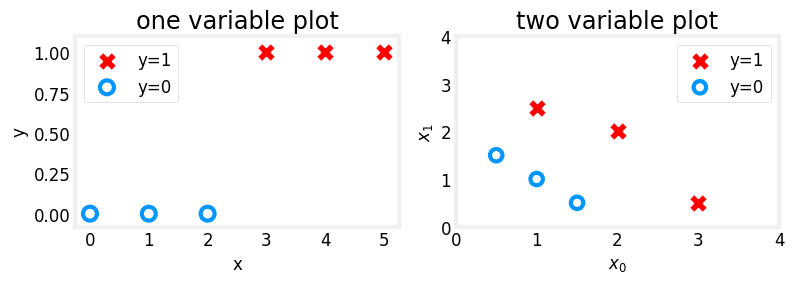

In [10]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

In [12]:
w_in = np.zeros((1))
b_in = 0
plt.close('all')

## Sigmoid Function

In [13]:
# Input is an array.
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print("Input to exp:", input_array)
print("Output of exp:", exp_array)

# Input is a single number
input_val = 1
exp_val = np.exp(input_val)

print("Input to exp:", input_val)
print("Output of exp:", exp_val)

Input to exp: [1 2 3]
Output of exp: [ 2.72  7.39 20.09]
Input to exp: 1
Output of exp: 2.718281828459045


In [14]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    g = 1/(1+np.exp(-z))

    return g

In [30]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


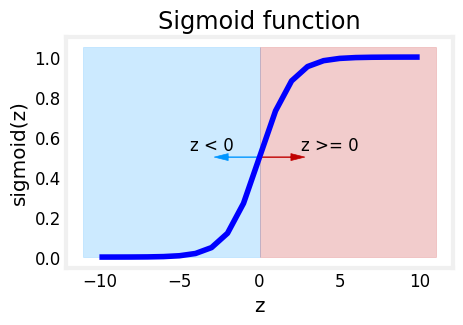

In [31]:
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

In [32]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

w_in = np.zeros((1))
b_in = 0

plt.close('all')

## Decision Boundary

In [33]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)

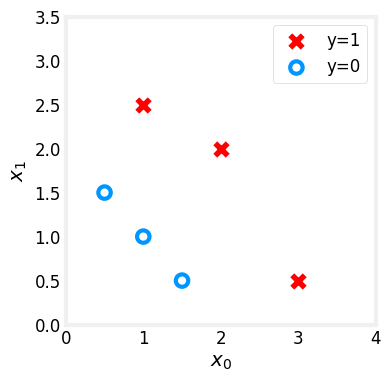

In [34]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X, y, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

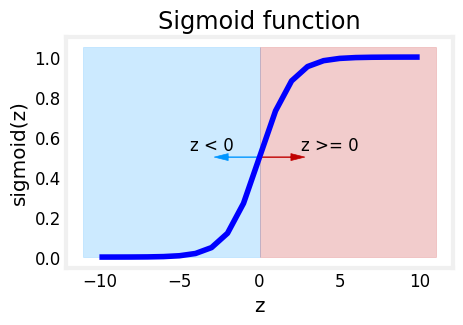

In [35]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

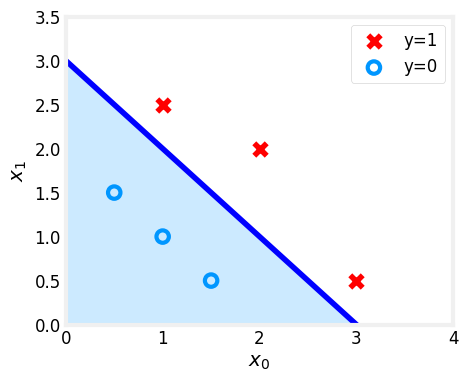

In [36]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(X,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

Yay! :)